In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps
from matplotlib.colors import LogNorm

In [3]:
def worldmap_norm(data, vmin=1e-30):
    projection = ccrs.PlateCarree(central_longitude=0)
    img_extent = (-180, 180, -90, 90)
    
    print(f"min {data.min()} max {data.max()}")
    log_norm = LogNorm(vmin=vmin, vmax=data.max())
    #log_norm_data = log_norm(data, clip=True)

    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    im = ax.imshow(data,
                   origin='upper',
                   extent=img_extent,
                   transform=projection,
                   cmap='GnBu',
                   norm=log_norm)
    fig.colorbar(im, ax=ax, orientation='horizontal')

In [8]:
def load(name, SUF='.hlf', day=356, second=86400, coef=1e12):
    if SUF == '.hlf':
        shape = (360, 720)
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.WFDEI.hlf'
    elif SUF == '.gl5':
        shape = (2160, 4320)
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.CAMA.gl5'
    dtype = 'float32' # 4バイト
    lnddir = '/home/kajiyama/H08/H08_20230612/lnd/out'
    file = lnddir + name
    
    # data
    data = np.fromfile(file, dtype=dtype)
    lonlat = data.reshape(shape)
    
    # mask out
    mask = np.fromfile(maskpath, dtype=dtype)
    mask = mask.reshape(shape)
    lonlat = np.ma.masked_where(mask==0, lonlat)
    lonlat = np.ma.masked_where(lonlat>1e19, lonlat)
    
    # conversion second to year
    adm = lonlat*day*second
    
    # conversion from kg to mm3
    # 1000kg = 1m3 = 1e9mm3
    # km3 = kg/1e12
    adm = adm/coef
    
    # sum up
    total = np.sum(adm)
    print(f"total {total} km3/year")
    
    return adm

In [9]:
def load_times_area(name, SUF='.hlf', day=356, second=86400, coef=1e12):
    if SUF == '.hlf':
        shape = (360, 720)
        areapath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_ara_/lndara.WFDEI.hlf'
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.WFDEI.hlf'
    elif SUF == '.gl5':
        shape = (2160, 4320)
        areapath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_ara_/lndara.CAMA.gl5'
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.CAMA.gl5'
    dtype = 'float32' # 4バイト
    lnddir = '/home/kajiyama/H08/H08_20230612/lnd/out'
    file = lnddir + name
    
    # area
    area = np.fromfile(areapath, dtype=dtype)
    area = area.reshape(shape)
    
    # data
    data = np.fromfile(file, dtype=dtype)
    lonlat = data.reshape(shape)
    
    # mask out
    mask = np.fromfile(maskpath, dtype=dtype)
    mask = mask.reshape(shape)
    lonlat = np.ma.masked_where(mask==0, lonlat)
    lonlat = np.ma.masked_where(lonlat>1e19, lonlat)
    
    # multiply area
    adm = lonlat*area
    
    # conversion from mm/s to mm/year
    adm = adm*day*second
    
    # conversion from kg to mm3
    # 1000kg = 1m3 = 1e9mm3
    # km3 = kg/1e12
    adm = adm/coef
    
    # sum up
    total = np.sum(adm)
    print(f"total {total} km3/year")
    
    return adm

# space
# space
# space


# Q_total

total 60649.73577072519 km3/year
min 1.67858501754381e-14 max 0.6581885904


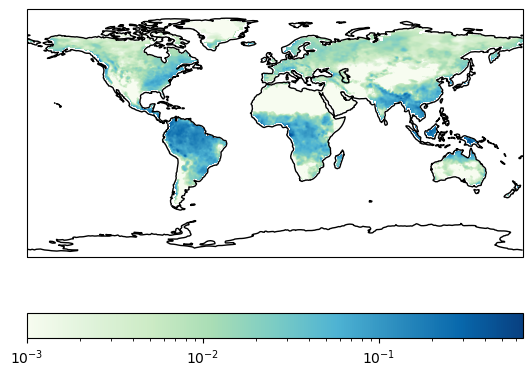

In [12]:
image = load_times_area(name='/Qtot____/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-3)

total 52390.89540712825 km3/year
min 0.0 max 23.261271552


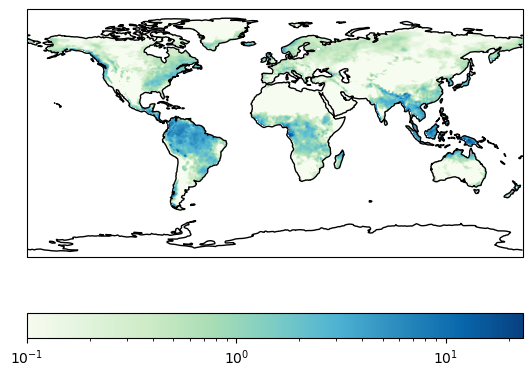

In [14]:
image = load_times_area(name='/Qtot____/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-1)

# Evapotranspiration

total 53512.377650805945 km3/year
min 5.174346908926964e-10 max 0.1217909088


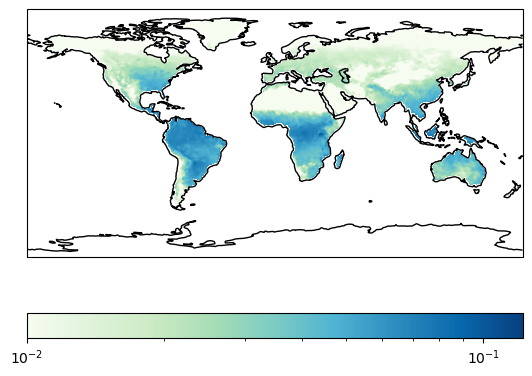

In [17]:
image = load_times_area(name='/Evap____/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-2)

total 74492.92687333055 km3/year
min -1.4480911195278167e-09 max 6.5333620224


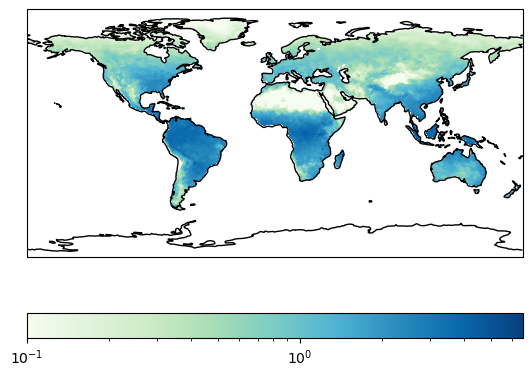

In [ ]:
image = load_times_area(name='/Evap____/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-1)

# Potential Evapotranstipation

total 340868.6763743422 km3/year
min 0.00117855354375 max 0.7872777504


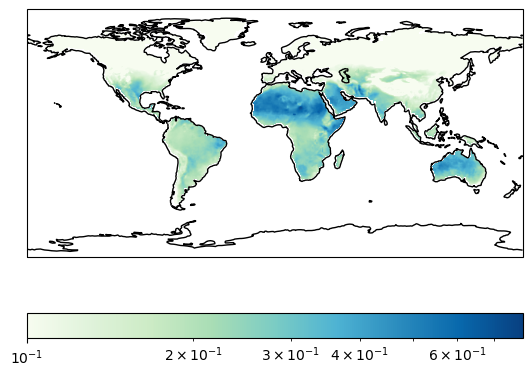

In [45]:
image = load_times_area(name='/PotEvap_/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-1)

total 218347.9363652832 km3/year
min 0.0404763642 max 13.0702892544


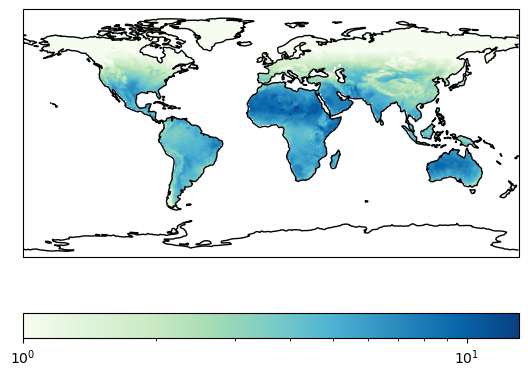

In [48]:
image = load_times_area(name='/PotEvap_/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1)

# Demand of Agriculture

total 9484.391954204708 km3/year
min 0.0 max 1.8264801024


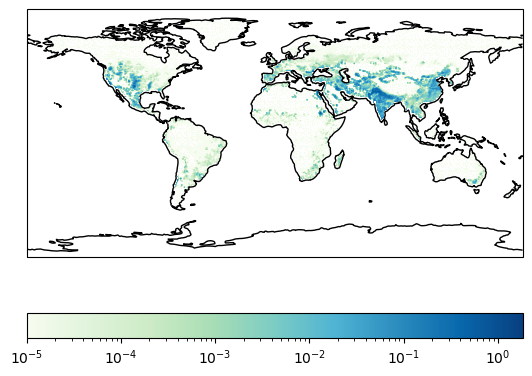

In [28]:
image = load(name='/DemAgr__/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-5)

total 10004.866403317004 km3/year
min 0.0 max 37.1496305664


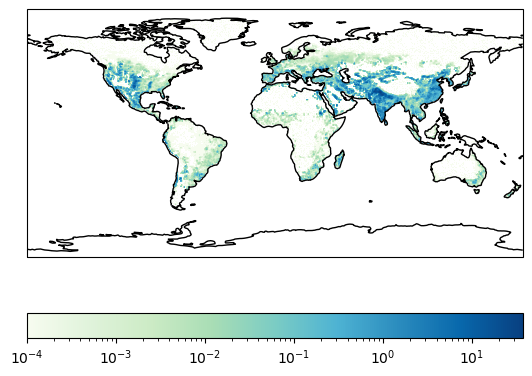

In [54]:
image = load(name='/DemAgr__/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-4)

# loss of agriculture

total 2676.7523369053156 km3/year
min 0.0 max 530.1541158912


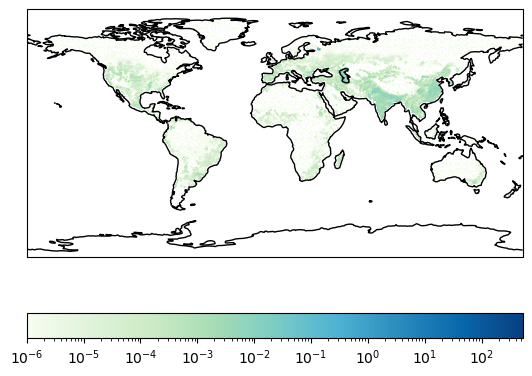

In [38]:
image = load(name='/LosAgr__/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

total 429.2547806623176 km3/year
min -1.6385752754285933e-11 max 1.2242725344


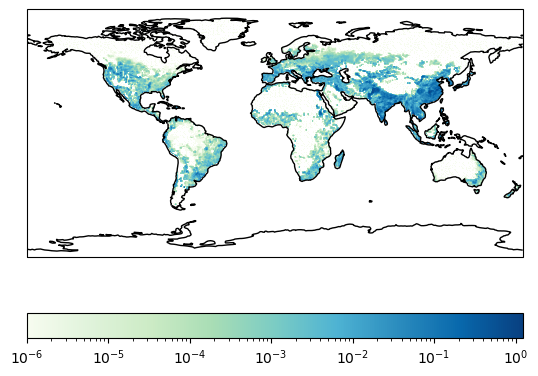

In [39]:
image = load(name='/LosAgr__/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

# returnflow of agriculture

total 2676.7523369053156 km3/year
min 0.0 max 530.1541158912


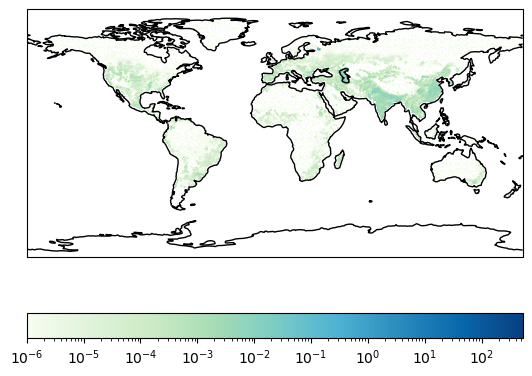

In [52]:
image = load(name='/RtFAgr__/W5E5LECD20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

total 429.2547806623176 km3/year
min -1.6385752754285933e-11 max 1.2242725344


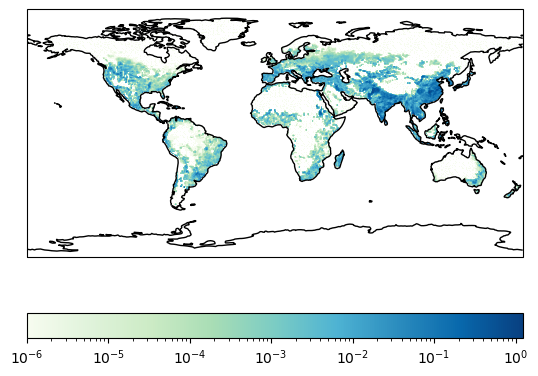

In [53]:
image = load(name='/RtFAgr__/W5E5LECD20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)